In [1]:
# median reduction over time

%matplotlib inline
import mpld3; mpld3.enable_notebook()

from datetime import datetime
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

datacube/index/postgres/tables/_dataset.py:11: SADeprecationWarning: The SQLAlchemy PostgreSQL dialect has been renamed from 'postgres' to 'postgresql'. The new URL format is postgresql[+driver]://<user>:<pass>@<host>/<dbname>
  from sqlalchemy.dialects import postgres
/home/rc/miniconda/lib/python2.7/site-packages/osgeo/gdal.py:80: DeprecationWarning: gdal.py was placed in a namespace, it is now available as osgeo.gdal
  DeprecationWarning)


In [2]:
# initialise AE/EE

a = AnalyticsEngine()
e = ExecutionEngine()

INFO:datacube.analytics.analytics_engine:Initialise Analytics Module.
INFO:datacube.execution.execution_engine:Initialise Execution Module.


In [3]:
# Lake Burley Griffin
dimensions = {'x':    {'range': (149.07, 149.18)},
              'y':    {'range': (-35.32, -35.28)},
              'time': {'range': (datetime(1990, 1, 1), datetime(1990, 12, 31))}}

arrays = a.create_array(('LANDSAT_5', 'nbar'), ['band_4'], dimensions, 'get_data')

median = a.apply_expression(arrays, 'median(array1, 0)', 'medianT')

In [4]:
e.execute_plan(a.plan)

plot3D


/home/rc/miniconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/rc/miniconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


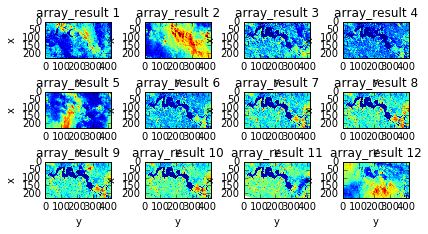

In [5]:
plot(e.cache['get_data'])

plot2D


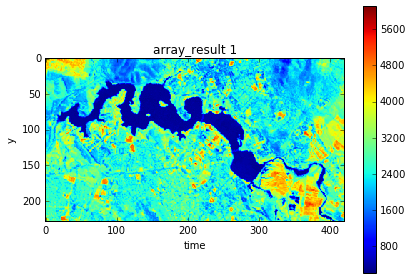

In [6]:
plot(e.cache['medianT'])